In [1]:
!pip install tensorflow

In [2]:
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy

In [3]:
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
# split into input (X) and output (Y) variables
gas = pd.read_csv("gas_turbines.csv")
X = gas.iloc[:,0:10]
Y = gas.iloc[:,10]
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494


In [4]:
gas.T

,0,1,2,3,4,5,6,7,8,9,...,15029,15030,15031,15032,15033,15034,15035,15036,15037,15038
AT,6.8594,6.7850,6.8977,7.0569,7.3978,7.6998,7.7901,7.7139,7.7975,8.0820,...,10.4540,10.3050,10.2380,10.3470,10.1550,9.0301,7.8879,7.2647,7.0060,6.9279
AP,1007.9000,1008.4000,1008.8000,1009.2000,1009.7000,1010.7000,1011.6000,1012.7000,1013.8000,1015.0000,...,1004.5000,1004.6000,1004.6000,1004.9000,1005.1000,1005.6000,1005.9000,1006.3000,1006.8000,1007.2000
AH,96.7990,97.1180,95.9390,95.2490,95.1500,92.7080,91.9830,91.3480,90.1960,88.5970,...,98.3880,99.2820,99.9950,100.1700,99.9850,98.4600,99.0930,99.4960,99.0080,97.5330
AFDP,3.5000,3.4998,3.4824,3.4805,3.4976,3.5236,3.5298,3.5088,3.5141,4.0612,...,3.5555,3.5339,3.8805,4.3198,3.7043,3.5421,3.5059,3.4770,3.4486,3.4275
GTEP,19.6630,19.7280,19.7790,19.7920,19.7650,19.6830,19.6590,19.6730,19.6340,23.4060,...,18.9370,18.9090,21.2060,24.0480,19.8370,19.1640,19.4140,19.5300,19.3770,19.3060
TIT,1059.2000,1059.3000,1059.4000,1059.6000,1059.7000,1059.8000,1060.0000,1059.8000,1060.1000,1083.0000,...,1053.4000,1053.3000,1067.5000,1084.3000,1059.7000,1049.7000,1046.3000,1037.7000,1043.2000,1049.9000
TAT,550.0000,550.0000,549.8700,549.9900,549.9800,549.9700,549.8700,549.9200,550.0900,550.2100,...,550.0300,550.0000,550.3200,549.9800,549.9000,546.2100,543.2200,537.3200,541.2400,545.8500
TEY,114.7000,114.7200,114.7100,114.7200,114.7200,114.7200,114.7100,114.7100,114.7200,131.7000,...,110.7800,110.7800,121.2600,133.7400,115.5200,111.6100,111.7800,110.1900,110.7400,111.5800
CDP,10.6050,10.5980,10.6010,10.6060,10.6120,10.6260,10.6440,10.6560,10.6440,11.6790,...,10.3270,10.3280,11.0020,11.6850,10.5700,10.4000,10.4330,10.4830,10.5330,10.5830
CO,3.1547,3.2363,3.2012,3.1923,3.2484,3.4467,3.4874,3.6043,3.3943,1.9081,...,3.6133,3.7118,2.6790,1.3663,3.3792,4.5186,4.8470,7.9632,6.2494,4.9816


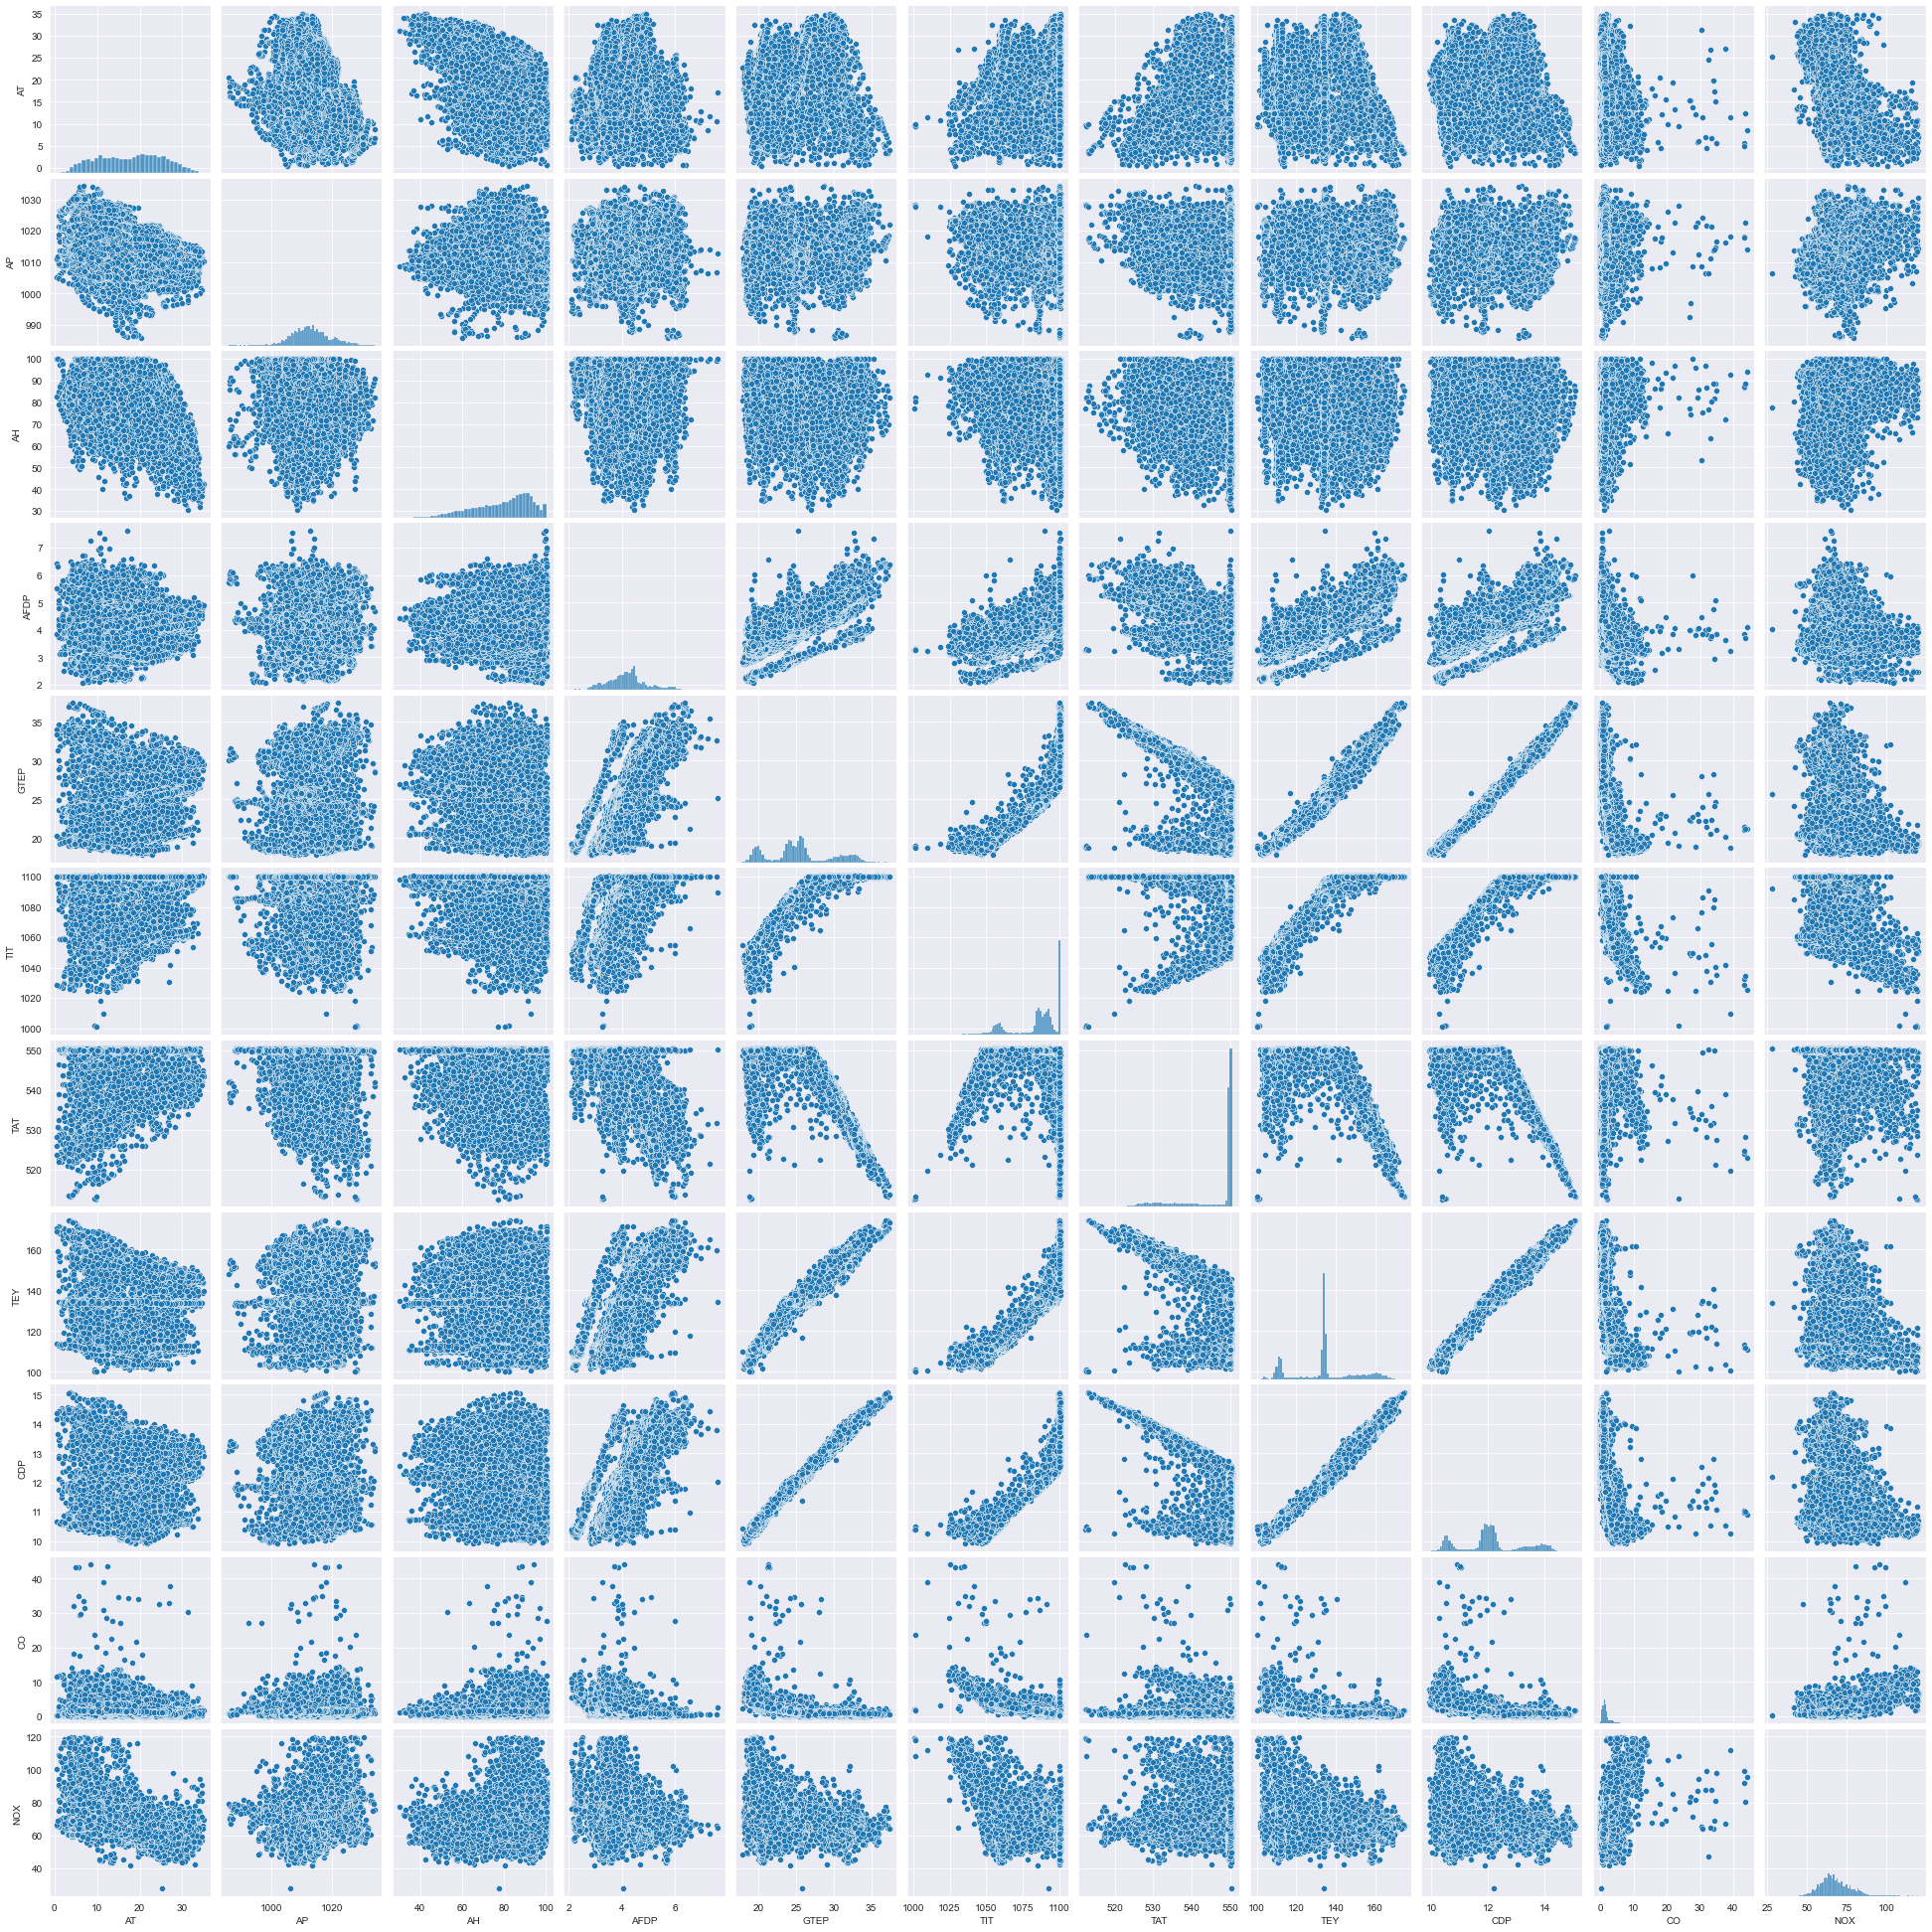

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.pairplot(gas)

plt.show()


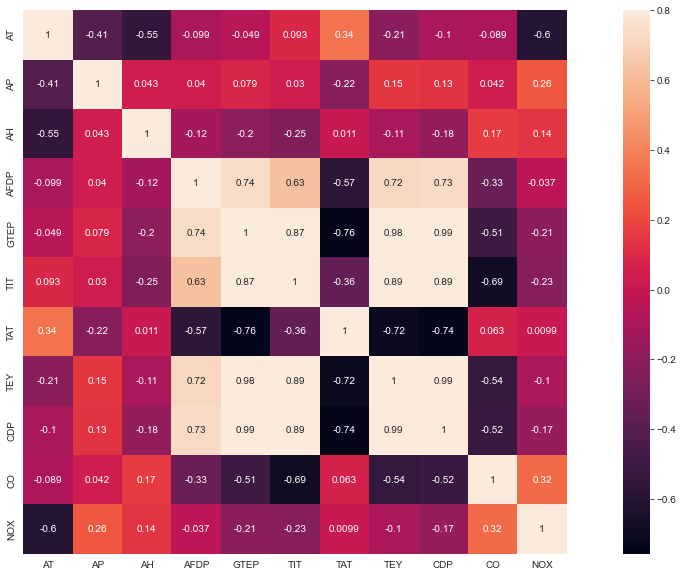

In [6]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = gas.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

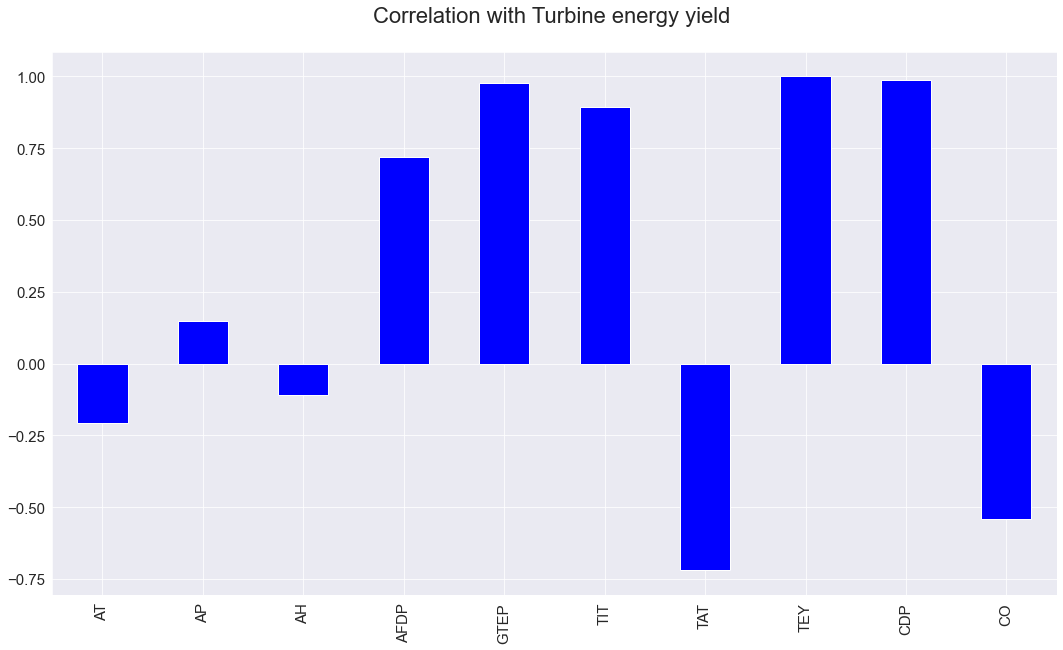

In [7]:
# correlation with TEY

data2 = X.copy()

correlations = data2.corrwith(gas["TEY"])
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'b',
        rot = 90, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [8]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [9]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [10]:
X_norm = norm_func(X)

In [11]:
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_norm, Y, epochs=150, batch_size=10)

Epoch 1/150
1504/1504 [==============================] - 5s 2ms/step - loss: -98696.5234 - accuracy: 0.0000e+00
Epoch 2/150
1504/1504 [==============================] - 3s 2ms/step - loss: -1220253.8750 - accuracy: 0.0000e+00A: 0s - loss: -1159808.5000 - accuracy: 0.0000
Epoch 3/150
1504/1504 [==============================] - 3s 2ms/step - loss: -4296392.0000 - accuracy: 0.0000e+00
Epoch 4/150
1504/1504 [==============================] - 3s 2ms/step - loss: -9741698.0000 - accuracy: 0.0000e+00
Epoch 5/150
1504/1504 [==============================] - 3s 2ms/step - loss: -17915964.0000 - accuracy: 0.0000e+00
Epoch 6/150
1504/1504 [==============================] - 3s 2ms/step - loss: -29182768.0000 - accuracy: 0.0000e+00
Epoch 7/150
1504/1504 [==============================] - 3s 2ms/step - loss: -43905212.0000 - accuracy: 0.0000e+00
Epoch 8/150
1504/1504 [==============================] - 3s 2ms/step - loss: -62449896.0000 - accuracy: 0.0000e+00
Epoch 9/150
1504/1504 [=================

In [13]:
accuracy = model.evaluate(X, Y)
print('Accuracy:  ' %(accuracy*100))

470/470 [==============================] - 1s 2ms/step - loss: -101459240681472.0000 - accuracy: 0.0000e+00
Accuracy:  
